## **Linear Regression with Python Scikit Learn**
In this regression analysis, our goal is to predict the percentage of marks that a student is expected to attain, leveraging the number of hours they have dedicated to studying. This task falls under the domain of simple linear regression, as it entails the analysis of a relationship between two variables.

Dataset: http://bit.ly/w-data



---



---




In [13]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [5]:
# Reading data
url = "http://bit.ly/w-data"
stud_df = pd.read_csv(url)
print("Data imported successfully.")

Data imported successfully



## **Exploratory Data Analysis**
Analyzing and investigating datasets.





In [8]:
stud_df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
stud_df.shape

(25, 2)

In [7]:
stud_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [9]:
stud_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [17]:
# Knowing null counts
null_counts = stud_df.isnull().sum()
print(null_counts)

Hours     0
Scores    0
dtype: int64


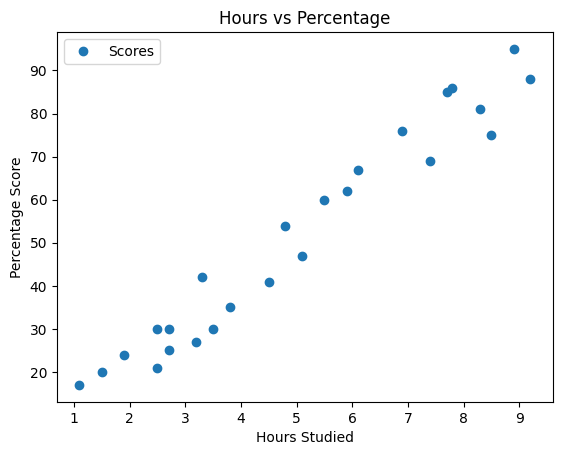

In [11]:
# Plotting the distribution of scores using Scatterplot
stud_df.plot(x='Hours', y='Scores', style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

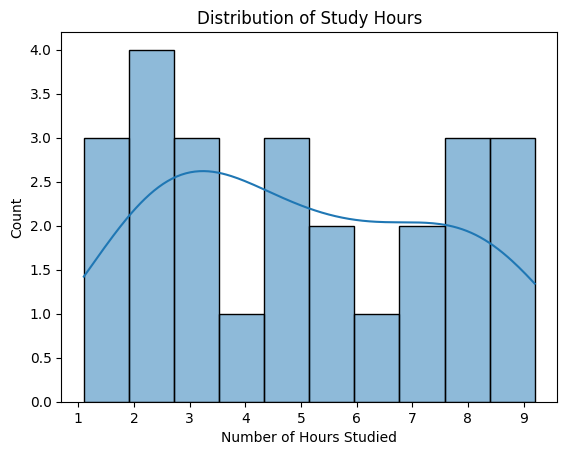

In [16]:
# Plotting the distribution using Histogram
sns.histplot(data=stud_df, x='Hours', bins=10, kde=True)

plt.xlabel('Number of Hours Studied')
plt.ylabel('Count')
plt.title('Distribution of Study Hours')

plt.show()

## **Preparing the data**
Preparing inputs.

In [24]:
X = stud_df.iloc[:, :-1].values
y = stud_df.iloc[:, 1].values

In [25]:
X[0:5]

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5]])

In [26]:
y[0:5]

array([21, 47, 27, 75, 30])

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## **Training the Algorithm**
Training our model using Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

print("Training complete.")

Training complete.


In [32]:
# the coefficients 
print(f'Coefficients: {regressor.coef_[0]}')
print(f'Intercept: {regressor.intercept_}')

Coefficients: 9.91065648064224
Intercept: 2.018160041434662


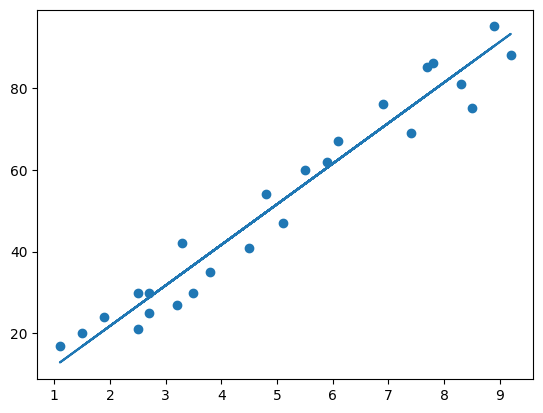

In [34]:
# Plotting the regression line 
line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data
plt.scatter(X, y)
plt.plot(X, line)
plt.show()

## **Making Predictions**
After training our model, implementing predictions.

In [35]:
print(X_test)
y_pred = regressor.predict(X_test) # prediting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [36]:
# Comparison Actual vs Predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [42]:
# Try own input
hours = [[4]]
pred = regressor.predict(hours)
print(f"No. of Hours = {hours[0][0]}")
print(f"Predicted Score = {pred[0]}")


No. of Hours = 4
Predicted Score = 41.66078596400362


## **Evaluating the model**
Evaluate the performance of the trained model.

In [43]:
from sklearn import metrics

# Calculating the Mean Absolute Error
mae = metrics.mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: %.2f" % mae)

# Calculating the Residual Sum of Squares (MSE)
mse = metrics.mean_squared_error(y_test, y_pred)
print("Residual Sum of Squares (MSE): %.2f" % mse)

# Calculating the R2-score
r2 = metrics.r2_score(y_test, y_pred)
print("R2-score: %.2f" % r2)


Mean Absolute Error: 4.18
Residual Sum of Squares (MSE): 21.60
R2-score: 0.95
